In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import yt
import numpy as np
import matplotlib.pyplot as plt
from yt.funcs import mylog
mylog.setLevel(0)

In [3]:
ds = yt.load('FULLY_WET_NEUTRAL/cplt000035999/')
ds1 = yt.load('FULLY_WET_NEUTRAL_NOWCA/cplt000049999/')


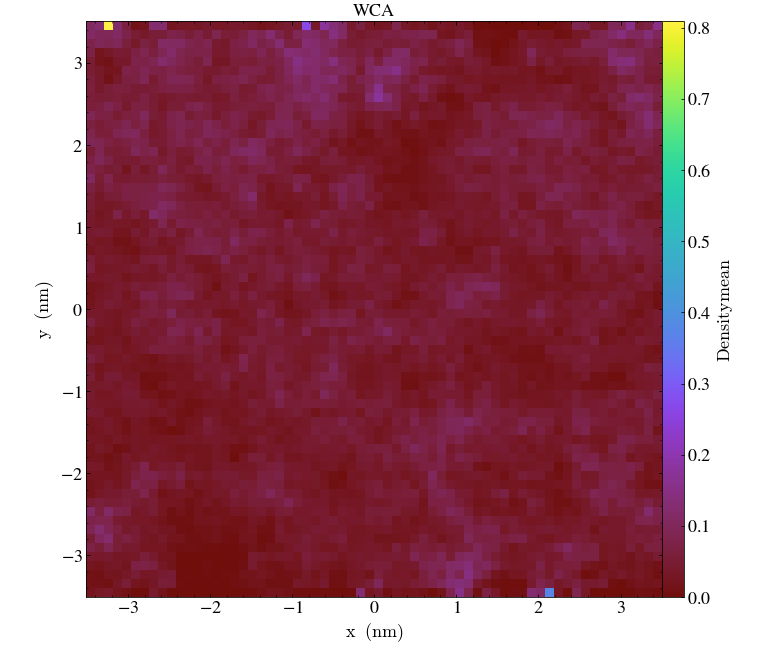

In [4]:
prj = yt.ProjectionPlot(ds,2,"densityMean",weight_field="z")
prj.set_log("densityMean",False)
prj.annotate_title("WCA")
prj.show()


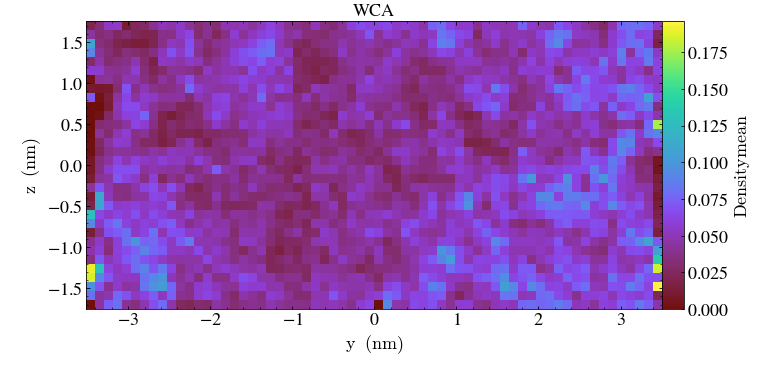

In [5]:
prj = yt.ProjectionPlot(ds,0,"densityMean",weight_field="x")
prj.set_log("densityMean",False)
prj.annotate_title("WCA")
prj.show()


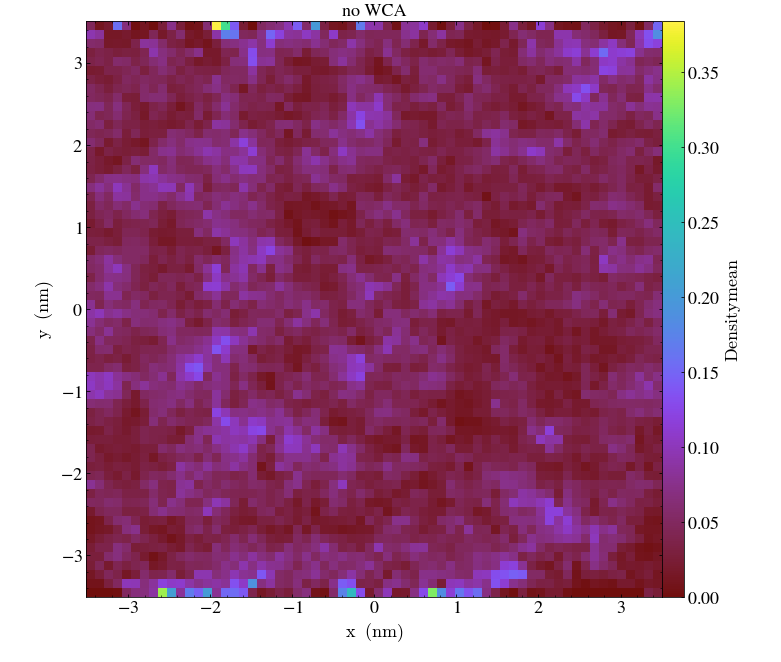

In [6]:
prj1 = yt.ProjectionPlot(ds1,2,"densityMean",weight_field="z")
prj1.set_log("densityMean",False)
prj1.annotate_title("no WCA")
prj1.show()


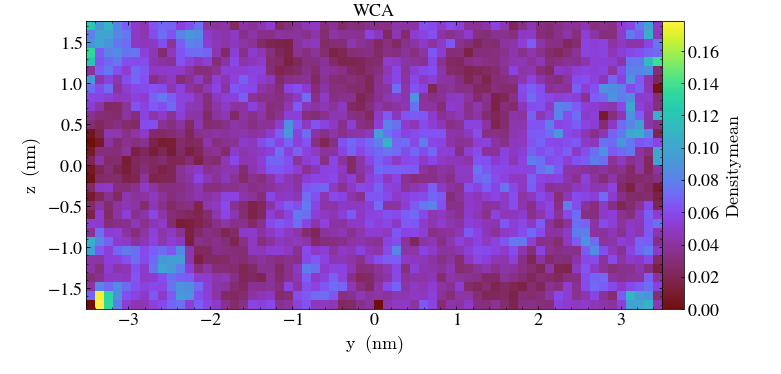

In [7]:
prj1 = yt.ProjectionPlot(ds1,0,"densityMean",weight_field="x")
prj1.set_log("densityMean",False)
prj1.annotate_title("WCA")
prj1.show()


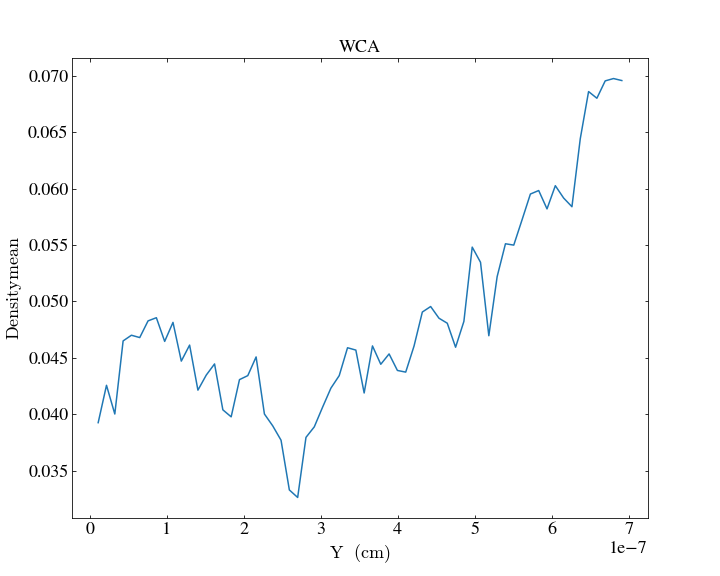

In [8]:
ad = ds.all_data()
plot = yt.ProfilePlot(ad,"y",["densityMean"],weight_field="cell_volume",x_log=False)
plot.set_log("densityMean",False)
plot.annotate_title("WCA")
plot.show()


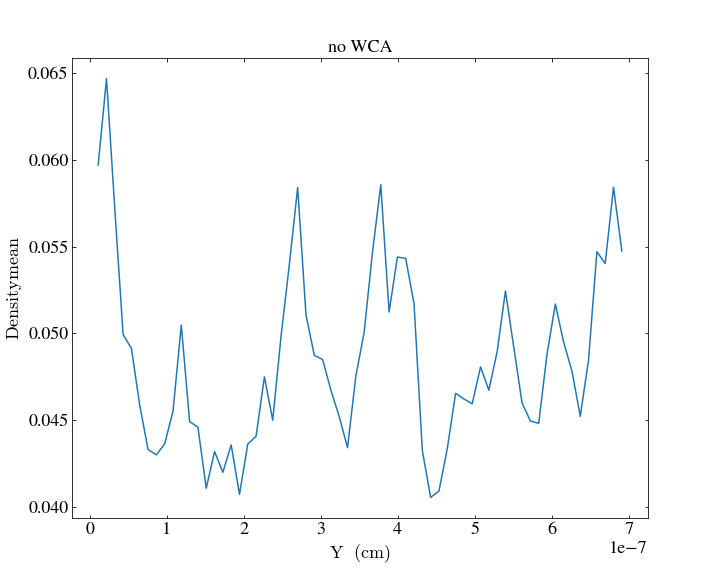

In [9]:
ad1 = ds1.all_data()
plot = yt.ProfilePlot(ad1,"y",["densityMean"],weight_field="cell_volume",x_log=False)
plot.set_log("densityMean",False)
plot.annotate_title("no WCA")
plot.show()

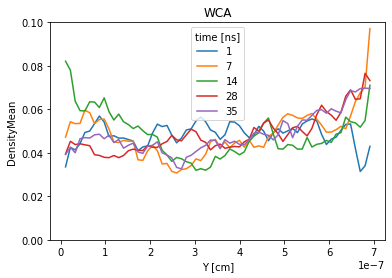

In [6]:
times = ["01999","07999","14999","28999","35999"]
files = []
for time in times:
    files.append('FULLY_WET_NEUTRAL/cplt0000'+time+'/')
ts = yt.DatasetSeries(files)
fig = plt.figure(); ax = fig.add_subplot()
for dd in ts:
    ad = dd.all_data()
    plot = yt.ProfilePlot(ad,"y",["densityMean"],weight_field="cell_volume",x_log=False)
    profile = plot.profiles[0]
    ax.plot(np.array(profile.x),np.array(profile["densityMean"]),label=str(int(1e9*dd.current_time.value)))

ax.set_xlabel('Y [cm]')
ax.set_ylabel('DensityMean')
ax.set_ylim([0.0,0.1])
ax.set_title("WCA")
plt.legend(loc=0,title="time [ns]")
plt.show()

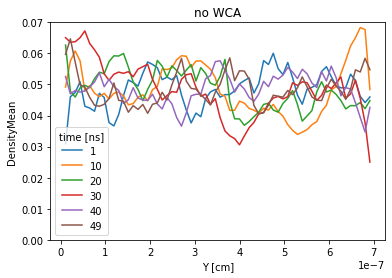

In [7]:
times = ["01999","10999","20999","30999","40999","49999"]
files = []
for time in times:
    files.append('FULLY_WET_NEUTRAL_NOWCA/cplt0000'+time+'/')
ts = yt.DatasetSeries(files)
fig = plt.figure(); ax = fig.add_subplot()
for dd in ts:
    ad = dd.all_data()
    plot = yt.ProfilePlot(ad,"y",["densityMean"],weight_field="cell_volume",x_log=False)
    profile = plot.profiles[0]
    ax.plot(np.array(profile.x),np.array(profile["densityMean"]),label=str(int(1e9*dd.current_time.value)))

ax.set_xlabel('Y [cm]')
ax.set_ylabel('DensityMean')
ax.set_ylim([0.0,0.07])
ax.set_title("no WCA")
plt.legend(loc=0,title="time [ns]")
plt.show()